In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

In [117]:
df= pd.read_csv('C:/Users/aarad/OneDrive/Desktop/train_u6lujuX_CVtuZ9i (1).csv')

In [118]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Loan ID is the person's unique ID wrt bank and doesn't play any role in the prediction

In [119]:
#dropping loan ID
df.drop('Loan_ID', axis = 1, inplace = True)

In [120]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [121]:
df.shape

(614, 12)

In [122]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [123]:
#identifying the countries
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [124]:
df.nunique(axis = 0)

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [125]:
#Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [126]:
#Our task is to predict whether a loan should be given to an individual or not

In [127]:
obj_var = [*df.select_dtypes('object').columns]

In [128]:
obj_var.remove('Loan_Status')

In [129]:
obj_var

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

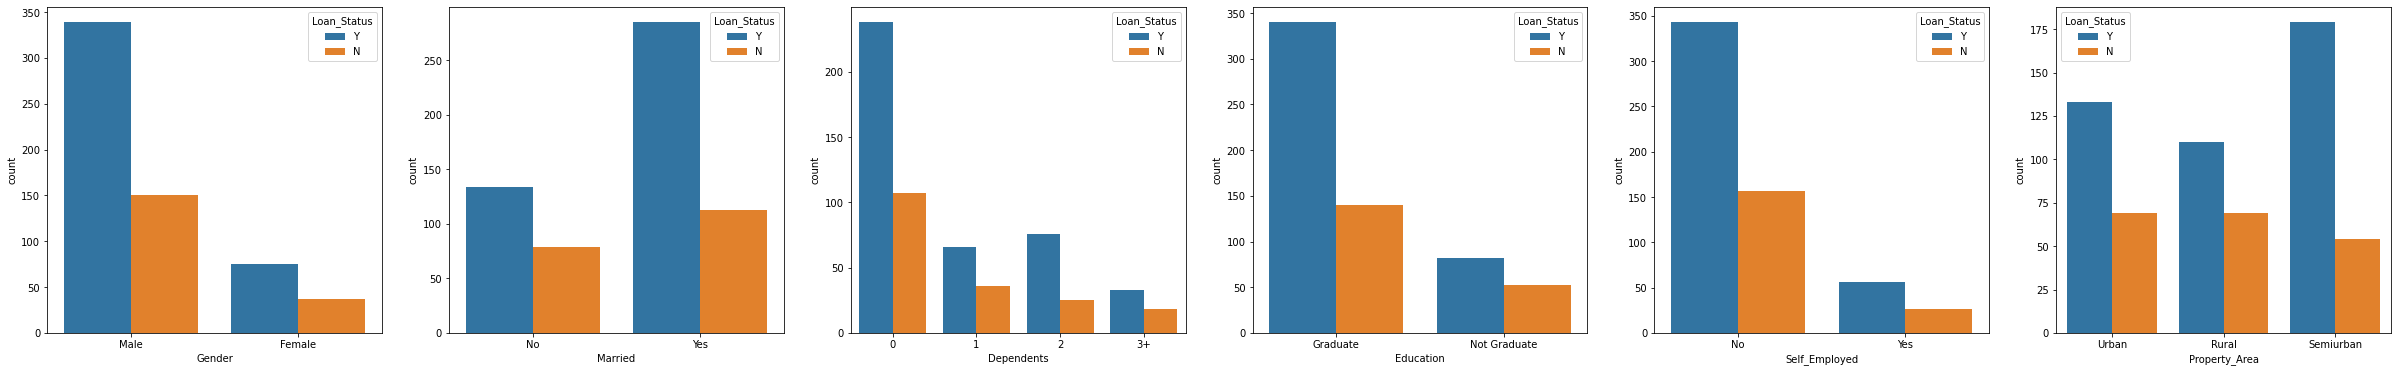

In [130]:
plt.figure(figsize = (42,42))
for idx, values in enumerate(obj_var):
    plt.subplot(6,6, idx+1)
    sns.countplot(values, data= df, hue='Loan_Status')

In [131]:
num_var = [*df.select_dtypes(['int64', 'float64']).columns]
num_var.remove("Credit_History")

plotting a histogram of each and then with repect to loan approval

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


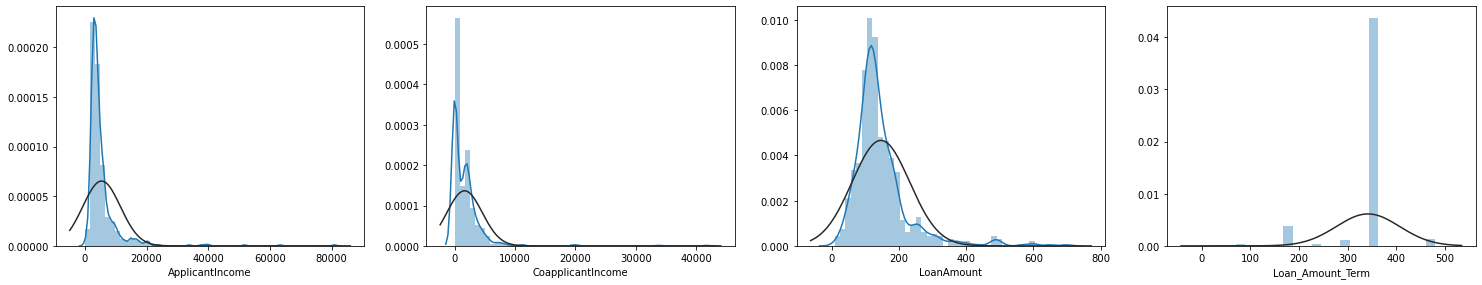

In [132]:
plt.figure(figsize = (52,52))
for ind, val in enumerate(num_var):
    plt.subplot(10,8, ind+1)
    sns.distplot(df[val], fit = norm)    

In [133]:
num_var.remove("Loan_Amount_Term")

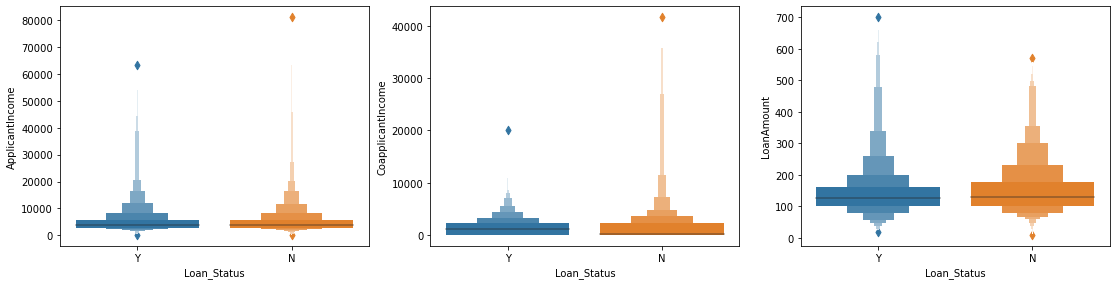

In [134]:
plt.figure(figsize = (52,52))
for ind, val in enumerate(num_var):
    plt.subplot(10,8, ind+1)
    sns.boxenplot(x = 'Loan_Status', y = val, data = df) 

### Observations so far:
1. There are **Nan values** in Gender, married, dependents, self_employed, loan ammount, loan amount term and credit history
2. there could be possible outliers in the dataset for ApplicantIncome, CoapplicantIncome and Loan_Amount.
3. Credit history seems to be a binary filed with just 0s and 1s, we will consider this a categorical feature.

In [135]:
#converting target column to integer type
df.Loan_Status.replace({'N':0,'Y':1}, inplace = True)
df['Loan_Status'] = df.Loan_Status.astype('int')

In [136]:
df['Dependents'] = df['Dependents'].fillna(0)
df.Dependents.replace({'3+':'3'}, inplace = True)
df['Dependents'] = df.Dependents.astype('int')
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df.Self_Employed.replace({'No':0,'Yes':1},inplace = True)
df['Self_Employed'] = df.Self_Employed.astype('int')

In [137]:
df['Gender'] = df['Gender'].fillna('Other')
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])+1
#df['Gender'].nunique() 3 unique values 1 male 2 femal3 other

In [138]:
df = df.fillna('0')

In [139]:
df.Married.replace({'No':0,'Yes':1},inplace = True)
df['Married'] = df.Married.astype('int')

In [140]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,0,0,Graduate,0,5849,0.0,0,360,1,Urban,1
1,2,1,1,Graduate,0,4583,1508.0,128,360,1,Rural,0
2,2,1,0,Graduate,1,3000,0.0,66,360,1,Urban,1
3,2,1,0,Not Graduate,0,2583,2358.0,120,360,1,Urban,1
4,2,0,0,Graduate,0,6000,0.0,141,360,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,Graduate,0,2900,0.0,71,360,1,Rural,1
610,2,1,3,Graduate,0,4106,0.0,40,180,1,Rural,1
611,2,1,1,Graduate,0,8072,240.0,253,360,1,Urban,1
612,2,1,2,Graduate,0,7583,0.0,187,360,1,Urban,1


In [141]:
df.Education.replace({'Graduate':1,'Not Graduate':0},inplace = True)
df['Education'] = df.Education.astype('int')

In [142]:
label_encoder = preprocessing.LabelEncoder()
df['Property Code']= label_encoder.fit_transform(df['Property_Area'])

In [143]:
df['LoanAmount'] = df.LoanAmount.astype('float64')
df['Loan_Amount_Term'] = df.Loan_Amount_Term.astype('float64')
df['Credit_History'] = df.Credit_History.astype('float64')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
 12  Property Code      614 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.7+ KB


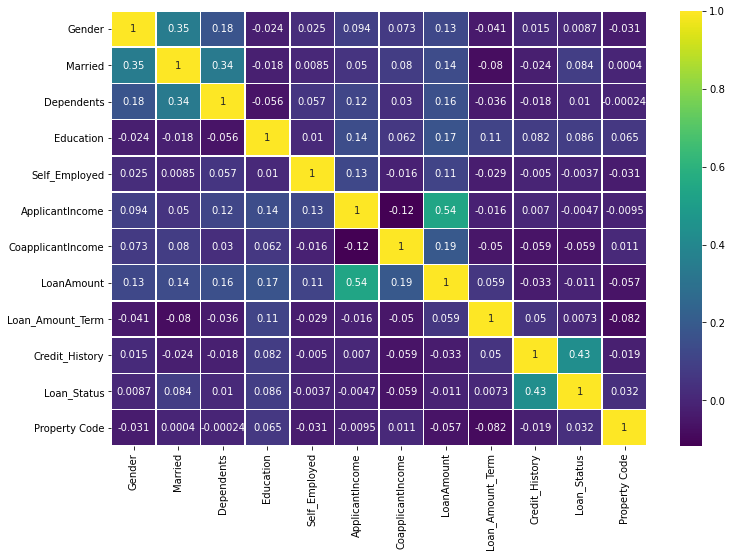

In [145]:
#plotting a heatmap to define correlation
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, linewidths=.5, ax=ax, cmap = 'viridis')

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['Gender', 'Married', 'Dependents','Self_Employed', 'ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property Code']],
    df['Loan_Status'],
    test_size=0.2,
    random_state=0)

In [147]:
#using logistic regression
logit= LogisticRegressionCV()
logit.fit(X_train, y_train)

logit_pred= logit.predict(X_test)

print(accuracy_score(y_test, logit_pred))

confusion_matrix(y_test, logit_pred)

0.8048780487804879


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[17, 16],
       [ 8, 82]], dtype=int64)

In [148]:
#Using Linear Support Vector Machine
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

sgd_pred= sgd_clf.predict(X_test)

print(accuracy_score(y_test, sgd_pred))

confusion_matrix(y_test, sgd_pred)

0.7317073170731707


array([[ 0, 33],
       [ 0, 90]], dtype=int64)

## Observations
1. Logistic regression works better than SDG (80% accuracy over 73%)
2. Non values can be elemenated easily.
3. Since it is a pretty small dataset, feature engineering doesn't improve much accuracy, and filling in NAN values results in better prediction